In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('F:/null class/Project/Final_dataset_of_job_descriptions.csv')

In [6]:
def extract_experience(experience_str):
    try:
        
        experience_str = experience_str.replace('Years', '').strip()
        lower, upper = experience_str.split('to')
        
        
        lower = int(lower.strip())
        upper = int(upper.strip())
        return (lower + upper) / 2
    except:
        return None
df['Experience_Numeric'] = df['Experience'].apply(extract_experience)

In [8]:
def parse_salary(salary_range):
    try:
        
        salary_range = salary_range.replace('$', '').strip()
        if '-' in salary_range:
            lower, upper = salary_range.split('-')
            lower = int(lower.replace('K', '').replace(',', '').strip()) * 1000
            upper = int(upper.replace('K', '').replace(',', '').strip()) * 1000
            return (lower + upper) / 2  
        else:
            return int(salary_range.replace('K', '').replace(',', '').strip()) * 1000
    except:
        return None
df['Salary_Numeric'] = df['Salary_Range'].apply(parse_salary)

In [10]:
df.head(3)

,Job_Id,Experience,Qualifications,Salary_Range,location,Country,latitude,longitude,Work_Type,Company_Size,...,Role,Job_Portal,Job_Description,Benefits,skills,Responsibilities,Company,Company_Profile,Experience_Numeric,Salary_Numeric
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",10.0,79000.0
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",7.0,86000.0
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",6.0,82500.0


1. Draw a chart between role,job title and job posting where job posting is between ’30-11-2021’ to’30-03-2022’ and work type should be Contract if the preference is male and work type should be Full-time if the preference is female and it should bring company name which are starting with M , A , E and job portal should be indeed as well as country should be starting with letter ‘B’.

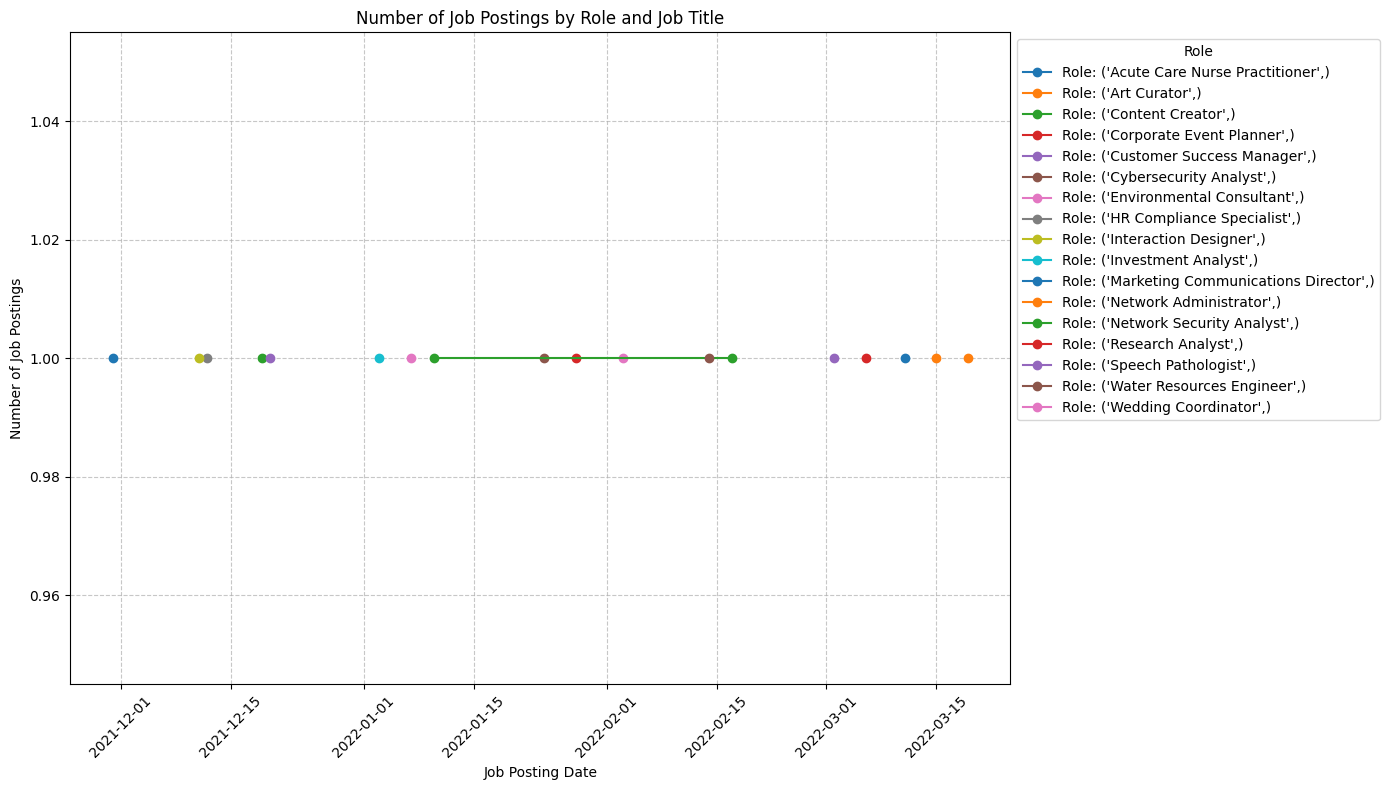

In [13]:
df['Job_Posting_Date'] = pd.to_datetime(df['Job_Posting_Date'])


start_date = '2021-11-30'
end_date = '2022-03-30'
preferred_work_types_male = 'Contract'
preferred_work_types_female = 'Full-Time'
company_starts_with = ['M', 'A', 'E']
job_portal = 'Indeed'
country_starts_with = 'B'


df_filtered = df[
    (df['Job_Posting_Date'] >= start_date) &
    (df['Job_Posting_Date'] <= end_date) &
    ((df['Preference'] == 'Male') & (df['Work_Type'] == preferred_work_types_male) |
     (df['Preference'] == 'Female') & (df['Work_Type'] == preferred_work_types_female)) &
    (df['Company'].str[0].isin(company_starts_with)) &
    (df['Job_Portal'] == job_portal) &
    (df['Country'].str.startswith(country_starts_with))
]


df_grouped = df_filtered.groupby(['Role', 'Job_Title', 'Job_Posting_Date']).size().reset_index(name='Count')


plt.figure(figsize=(14, 8))
for key, grp in df_grouped.groupby(['Role']):
    plt.plot(grp['Job_Posting_Date'], grp['Count'], marker='o', label=f'Role: {key}')

plt.xlabel('Job Posting Date')
plt.ylabel('Number of Job Postings')
plt.title('Number of Job Postings by Role and Job Title')
plt.legend(title='Role', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Draw a chart for top 5 roles in 2023 and work type=’Intern’ and Job Title should be Account Director and company should be below 2M.

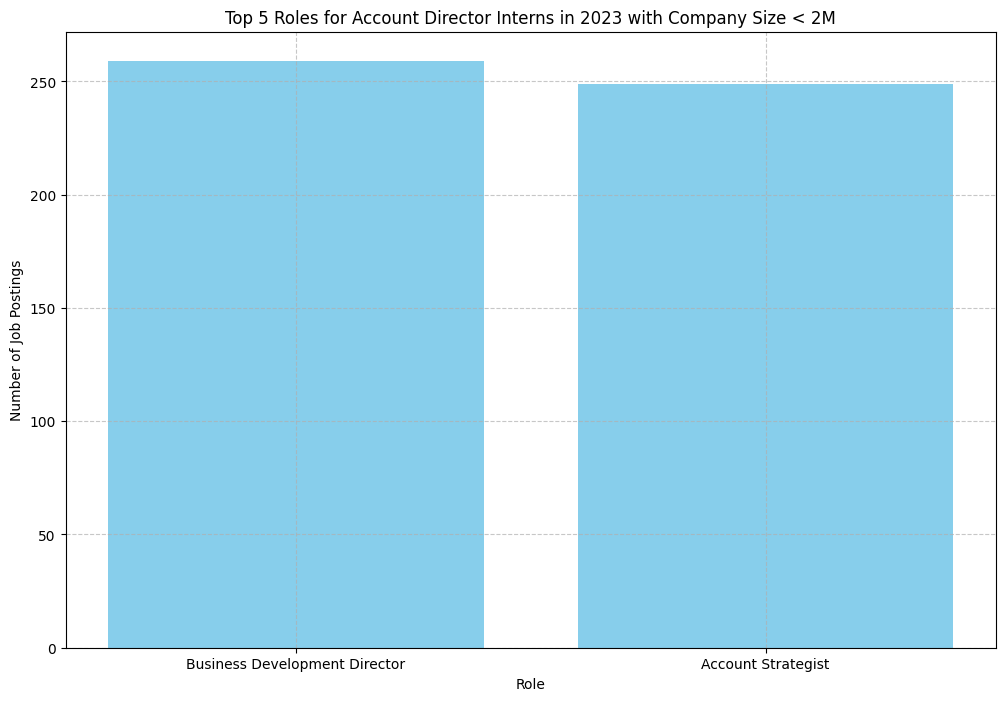

In [15]:

df['Job_Posting_Date'] = pd.to_datetime(df['Job_Posting_Date'])


df_filtered1 = df[
    (df['Job_Posting_Date'].dt.year == 2023) &
    (df['Work_Type'] == 'Intern') &
    (df['Job_Title'] == 'Account Director') &
    (df['Company_Size'] < 2_000_000) 
]


df_role_counts = df_filtered1['Role'].value_counts().head(5).reset_index()
df_role_counts.columns = ['Role', 'Count']


plt.figure(figsize=(12, 8))
plt.bar(df_role_counts['Role'], df_role_counts['Count'], color='skyblue')
plt.xlabel('Role')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Roles for Account Director Interns in 2023 with Company Size < 2M')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

3. Draw a chart for top 20 companies who have max user Experience Designer as Role and UI/UX Designer as Job title and company name should be more than 5 characters.

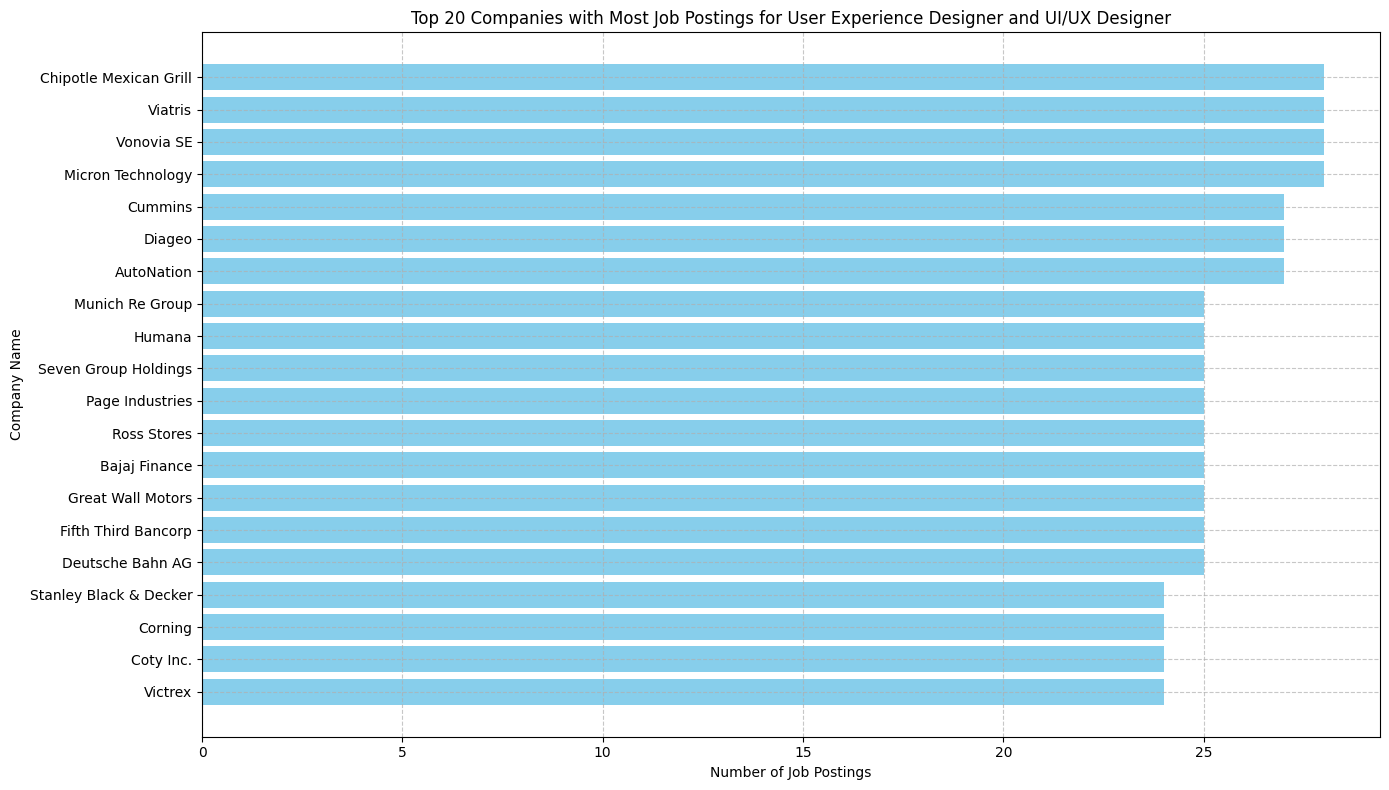

In [21]:

df_filtered2 = df[
    (df['Role'] == 'User Experience Designer') &
    (df['Job_Title'] == 'UX/UI Designer') &
    (df['Company'].str.len() > 5)
]


df_company_counts = df_filtered2['Company'].value_counts().head(20).reset_index()
df_company_counts.columns = ['Company', 'Count']


plt.figure(figsize=(14, 8))
plt.barh(df_company_counts['Company'], df_company_counts['Count'], color='skyblue')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.title('Top 20 Companies with Most Job Postings for User Experience Designer and UI/UX Designer')
plt.gca().invert_yaxis()  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()